In [1]:
from chesslab_.agent_stockfish import agent
from chesslab_.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

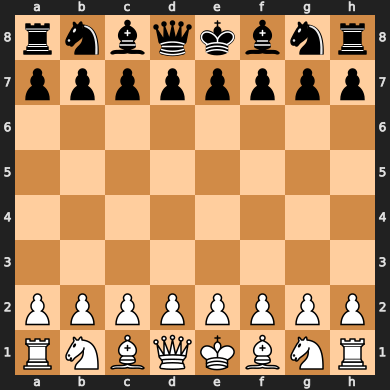

In [2]:
board=chess.Board()
board

In [3]:
path = 'E:/database/stockfish_14.exe'
deepbot = agent(path,0)
move=deepbot.select_move(board)
move

Move.from_uci('d2d4')

In [4]:
moves,values=deepbot.get_move_values(board)

In [5]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [6]:
values

array([0.46315789, 0.96842105, 0.85263158, 0.40526316, 0.85789474,
       0.94210526, 0.16315789, 0.92631579, 0.85789474, 0.92105263,
       0.78947368, 0.87368421, 0.63157895, 0.        , 0.68421053,
       0.98947368, 1.        , 0.99473684, 0.67368421, 0.66842105])

In [7]:
from chesslab_.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 1.0],
       [Move.from_uci('c2c4'), 0.9947368421052631],
       [Move.from_uci('e2e4'), 0.9894736842105263],
       [Move.from_uci('g1f3'), 0.968421052631579],
       [Move.from_uci('g2g3'), 0.9421052631578948],
       [Move.from_uci('e2e3'), 0.9263157894736842],
       [Move.from_uci('c2c3'), 0.9210526315789473],
       [Move.from_uci('a2a3'), 0.8736842105263158],
       [Move.from_uci('h2h3'), 0.8578947368421053],
       [Move.from_uci('d2d3'), 0.8578947368421053],
       [Move.from_uci('b1c3'), 0.8526315789473684],
       [Move.from_uci('b2b3'), 0.7894736842105263],
       [Move.from_uci('f2f4'), 0.6842105263157895],
       [Move.from_uci('b2b4'), 0.6736842105263158],
       [Move.from_uci('a2a4'), 0.6684210526315789],
       [Move.from_uci('h2h4'), 0.631578947368421],
       [Move.from_uci('g1h3'), 0.4631578947368421],
       [Move.from_uci('b1a3'), 0.4052631578947368],
       [Move.from_uci('f2f3'), 0.1631578947368421],
       [Move.from_uci('g2g4')

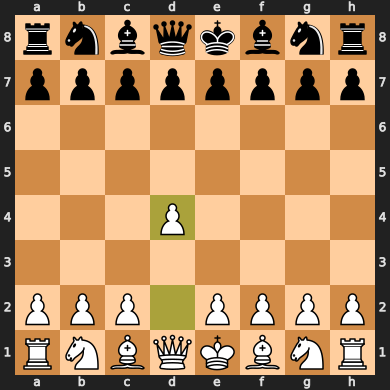

In [8]:
board.push(move)
board

In [9]:
ss = kaufman_test(deepbot)
ss

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


0.24

In [10]:
import chess.svg
from IPython.display import display
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 6/25 = 0.24 | weighted = 0.61
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 27 & 48 & 0.4468 & 0.6655 & e4g5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6988 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8442 & c2d4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5225 & c8c5 & 1.0000  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.9083 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7582 & f8d8 & 1.0000  \\
08 & h7h6 & 16 & 39 & 0.6053 & 0.6378 & f8f7 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.8099 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9235 & d5f4 & 1.0000  \\
11 & g3f5 & 21 & 35 & 0.4118 & 0.4699 & d7f7 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2351 & e7d8 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.7358 & d1e3 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7372 & f1d1 & 1.0000  \\
15 & d3f5 & 1

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  0.665511           e4g5              1.0    27           48   
1       f5d4  0.698828           h7h5              1.0    28           39   
2       e1d1  1.000000           e1d1              1.0     1           38   
3       b1b2  0.844214           c2d4              1.0    26           47   
4       g5c1  0.522486           c8c5              1.0    25           48   
5       a3a2  0.908323           d7b8              1.0     2           31   
6       b7e4  0.758214           f8d8              1.0    23           33   
7       h7h6  0.637765           f8f7              1.0    16           39   
8       f3e2  0.809859           a1c1              1.0     2           35   
9       d5c3  0.923518           d5f4              1.0     2           41   
10      g3f5  0.469891           d7f7              1.0    21           35   
11      c6d6  0.235130           e7d8              1.0    30           41   
12      c3d5  0.735849           d1e3              1.0    21           30   
13      b1b2  0.737179           f1d1              1.0    26           49   
14      d3f5  0.854707           g3h5              1.0    14           51   
15      b3b4  1.000000           b3b4              1.0     1           10   
16      e4e5  0.983065           b2b3              1.0     4           42   
17      a8c8  0.207739           a8a7              1.0    25           34   
18      a4d7  0.471338           a4b4              1.0    32           39   
19      h3g4  0.000000           h1h2              1.0    10           10   
20      c4b5  1.000000           c4b5              1.0     1           13   
21      b8a7  0.471338           h7g7              1.0    11           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   0.446809  
1   0.289474  
2   1.000000  
3   0.456522  
4   0.489362  
5   0.966667  
6   0.312500  
7   0.605263  
8   0.970588  
9   0.975000  
10  0.411765  
11  0.275000  
12  0.310345  
13  0.479167  
14  0.740000  
15  1.000000  
16  0.926829  
17  0.272727  
18  0.184211  
19  0.000000  
20  1.000000  
21  0.090909  
22  1.000000  
23  1.000000  
24  1.000000

In [11]:
deepbot.set_depth(3)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 5/25 = 0.2 | weighted = 0.6
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 19 & 48 & 0.6170 & 0.6476 & c1c7 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.7039 & a5d5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 23 & 47 & 0.5217 & 0.8442 & c2d4 & 1.0000  \\
05 & g5c1 & 20 & 48 & 0.5957 & 0.5252 & c8c4 & 1.0000  \\
06 & a3a2 & 9 & 31 & 0.7333 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 22 & 33 & 0.3438 & 0.7614 & d7c5 & 1.0000  \\
08 & h7h6 & 15 & 39 & 0.6316 & 0.6118 & f8e8 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.8099 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9738 & d5f4 & 1.0000  \\
11 & g3f5 & 22 & 35 & 0.3824 & 0.4256 & d7g7 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2351 & e7g5 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7258 & c3e2 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7194 & d3f3 & 1.0000  \\
15 & d3f5 & 14 

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  0.647555           c1c7              1.0    19           48   
1       f5d4  0.703906           a5d5              1.0    28           39   
2       e1d1  1.000000           e1d1              1.0     1           38   
3       b1b2  0.844214           c2d4              1.0    23           47   
4       g5c1  0.525203           c8c4              1.0    20           48   
5       a3a2  0.785283           d7b8              1.0     9           31   
6       b7e4  0.761421           d7c5              1.0    22           33   
7       h7h6  0.611753           f8e8              1.0    15           39   
8       f3e2  0.809859           a1c1              1.0     2           35   
9       d5c3  0.973790           d5f4              1.0     2           41   
10      g3f5  0.425553           d7g7              1.0    22           35   
11      c6d6  0.235130           e7g5              1.0    30           41   
12      c3d5  0.725758           c3e2              1.0    22           30   
13      b1b2  0.719392           d3f3              1.0    26           49   
14      d3f5  0.837936           a1d1              1.0    14           51   
15      b3b4  0.970260           e4e5              1.0     2           10   
16      e4e5  0.958155           f1e1              1.0    10           42   
17      a8c8  0.207528           f8e8              1.0    23           34   
18      a4d7  0.476267           a4b4              1.0    32           39   
19      h3g4  0.000000           h1g2              1.0    10           10   
20      c4b5  1.000000           c4b5              1.0     1           13   
21      b8a7  0.482085           b8f4              1.0    11           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   0.617021  
1   0.289474  
2   1.000000  
3   0.521739  
4   0.595745  
5   0.733333  
6   0.343750  
7   0.631579  
8   0.970588  
9   0.975000  
10  0.382353  
11  0.275000  
12  0.275862  
13  0.479167  
14  0.740000  
15  0.888889  
16  0.780488  
17  0.333333  
18  0.184211  
19  0.000000  
20  1.000000  
21  0.090909  
22  1.000000  
23  1.000000  
24  1.000000

In [12]:
deepbot.set_depth(10)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 10/25 = 0.4 | weighted = 0.67
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 22 & 48 & 0.5532 & 0.5066 & c1c7 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6775 & h7h6 & 1.0000  \\
03 & e1d1 & 19 & 38 & 0.5135 & 0.5850 & h4h5 & 1.0000  \\
04 & b1b2 & 25 & 47 & 0.4783 & 0.8531 & c2b4 & 1.0000  \\
05 & g5c1 & 22 & 48 & 0.5532 & 0.5252 & c8e8 & 1.0000  \\
06 & a3a2 & 12 & 31 & 0.6333 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 3 & 39 & 0.9474 & 1.0000 & f8f3 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 20 & 35 & 0.4412 & 0.3991 & d7g7 & 1.0000  \\
12 & c6d6 & 5 & 41 & 0.9000 & 1.0000 & e7d8 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.8051 & d1e3 & 1.0000  \\
14 & b1b2 & 28 & 49 & 0.4375 & 0.6075 & f1d1 & 1.0000  \\
15 & d3f5 & 42

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  0.506596           c1c7              1.0    22           48   
1       f5d4  0.677536           h7h6              1.0    28           39   
2       e1d1  0.584980           h4h5              1.0    19           38   
3       b1b2  0.853073           c2b4              1.0    25           47   
4       g5c1  0.525203           c8e8              1.0    22           48   
5       a3a2  0.785283           d7b8              1.0    12           31   
6       b7e4  1.000000           b7e4              1.0     1           33   
7       h7h6  1.000000           f8f3              1.0     3           39   
8       f3e2  1.000000           f3e2              1.0     1           35   
9       d5c3  1.000000           d5c3              1.0     1           41   
10      g3f5  0.399057           d7g7              1.0    20           35   
11      c6d6  1.000000           e7d8              1.0     5           41   
12      c3d5  0.805139           d1e3              1.0    21           30   
13      b1b2  0.607493           f1d1              1.0    28           49   
14      d3f5  0.178121           a1d1              1.0    42           51   
15      b3b4  1.000000           b3b4              1.0     1           10   
16      e4e5  1.000000           e4e5              1.0     1           42   
17      a8c8  0.194842           f8e8              1.0    22           34   
18      a4d7  0.469469           e7g6              1.0    32           39   
19      h3g4  0.000000           h1g2              1.0    10           10   
20      c4b5  1.000000           c4b5              1.0     1           13   
21      b8a7  1.000000           b8a7              1.0     1           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   0.553191  
1   0.289474  
2   0.513514  
3   0.478261  
4   0.553191  
5   0.633333  
6   1.000000  
7   0.947368  
8   1.000000  
9   1.000000  
10  0.441176  
11  0.900000  
12  0.310345  
13  0.437500  
14  0.180000  
15  1.000000  
16  1.000000  
17  0.363636  
18  0.184211  
19  0.000000  
20  1.000000  
21  1.000000  
22  1.000000  
23  1.000000  
24  1.000000

In [13]:
deepbot.set_depth(15)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 14/25 = 0.56 | weighted = 0.78
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 6 & 38 & 0.8649 & 0.8091 & h4h5 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8602 & c2b4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5283 & c8c3 & 1.0000  \\
06 & a3a2 & 17 & 31 & 0.4667 & 0.6212 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 9 & 39 & 0.7895 & 1.0000 & f8f4 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 3 & 41 & 0.9500 & 1.0000 & e7e6 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.8171 & c3e2 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 19 & 5

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  1.000000           e4f6              1.0     1           48   
1       f5d4  1.000000           f5d4              1.0     1           39   
2       e1d1  0.809072           h4h5              1.0     6           38   
3       b1b2  0.860166           c2b4              1.0    26           47   
4       g5c1  0.528271           c8c3              1.0    25           48   
5       a3a2  0.621230           d7b8              1.0    17           31   
6       b7e4  1.000000           b7e4              1.0     1           33   
7       h7h6  1.000000           f8f4              1.0     9           39   
8       f3e2  1.000000           f3e2              1.0     1           35   
9       d5c3  1.000000           d5c3              1.0     1           41   
10      g3f5  1.000000           g3f5              1.0     1           35   
11      c6d6  1.000000           e7e6              1.0     3           41   
12      c3d5  0.817089           c3e2              1.0    21           30   
13      b1b2  1.000000           b1b2              1.0     1           49   
14      d3f5  0.751140           g3f5              1.0    19           51   
15      b3b4  1.000000           b3b4              1.0     1           10   
16      e4e5  1.000000           e4e5              1.0     1           42   
17      a8c8  0.210329           f8e8              1.0    21           34   
18      a4d7  0.475884           e7g6              1.0    31           39   
19      h3g4  0.000000           h1h2              1.0    10           10   
20      c4b5  1.000000           c4b5              1.0     1           13   
21      b8a7  1.000000           b8a7              1.0     1           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   1.000000  
1   1.000000  
2   0.864865  
3   0.456522  
4   0.489362  
5   0.466667  
6   1.000000  
7   0.789474  
8   1.000000  
9   1.000000  
10  1.000000  
11  0.950000  
12  0.310345  
13  1.000000  
14  0.640000  
15  1.000000  
16  1.000000  
17  0.393939  
18  0.210526  
19  0.000000  
20  1.000000  
21  1.000000  
22  1.000000  
23  1.000000  
24  1.000000

In [14]:
deepbot.set_depth(20)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 18/25 = 0.72 | weighted = 0.89
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 2 & 38 & 0.9730 & 0.9358 & h4h5 & 1.0000  \\
04 & b1b2 & 1 & 47 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 1.0000 & g5c1 & 1.0000  \\
06 & a3a2 & 5 & 31 & 0.8667 & 0.8999 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 9 & 39 & 0.7895 & 1.0000 & f8f4 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 12 & 41 & 0.7250 & 1.0000 & e7d8 & 1.0000  \\
13 & c3d5 & 20 & 30 & 0.3448 & 0.7734 & d3e2 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 1 & 51 &

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  1.000000           e4f6              1.0     1           48   
1       f5d4  1.000000           f5d4              1.0     1           39   
2       e1d1  0.935829           h4h5              1.0     2           38   
3       b1b2  1.000000           b1b2              1.0     1           47   
4       g5c1  1.000000           g5c1              1.0     1           48   
5       a3a2  0.899900           d7b8              1.0     5           31   
6       b7e4  1.000000           b7e4              1.0     1           33   
7       h7h6  1.000000           f8f4              1.0     9           39   
8       f3e2  1.000000           f3e2              1.0     1           35   
9       d5c3  1.000000           d5c3              1.0     1           41   
10      g3f5  1.000000           g3f5              1.0     1           35   
11      c6d6  1.000000           e7d8              1.0    12           41   
12      c3d5  0.773427           d3e2              1.0    20           30   
13      b1b2  1.000000           b1b2              1.0     1           49   
14      d3f5  1.000000           d3f5              1.0     1           51   
15      b3b4  1.000000           b3b4              1.0     1           10   
16      e4e5  1.000000           e4e5              1.0     1           42   
17      a8c8  0.331307           f8e8              1.0    23           34   
18      a4d7  1.000000           a4d7              1.0     1           39   
19      h3g4  0.053735           h1h2              1.0     9           10   
20      c4b5  1.000000           c4b5              1.0     1           13   
21      b8a7  1.000000           b8a7              1.0     1           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   1.000000  
1   1.000000  
2   0.972973  
3   1.000000  
4   1.000000  
5   0.866667  
6   1.000000  
7   0.789474  
8   1.000000  
9   1.000000  
10  1.000000  
11  0.725000  
12  0.344828  
13  1.000000  
14  1.000000  
15  1.000000  
16  1.000000  
17  0.333333  
18  1.000000  
19  0.111111  
20  1.000000  
21  1.000000  
22  1.000000  
23  1.000000  
24  1.000000

In [20]:
deepbot.set_depth(25)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 19/25 = 0.76 | weighted = 0.93
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 3 & 38 & 0.9459 & 0.9175 & f2f5 & 1.0000  \\
04 & b1b2 & 1 & 47 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 1.0000 & g5c1 & 1.0000  \\
06 & a3a2 & 3 & 31 & 0.9333 & 0.9149 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 6 & 39 & 0.8684 & 1.0000 & f8f3 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 1 & 41 & 1.0000 & 1.0000 & c6d6 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.7718 & d3e2 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 1 & 51 & 

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  1.000000           e4f6              1.0     1           48   
1       f5d4  1.000000           f5d4              1.0     1           39   
2       e1d1  0.917515           f2f5              1.0     3           38   
3       b1b2  1.000000           b1b2              1.0     1           47   
4       g5c1  1.000000           g5c1              1.0     1           48   
5       a3a2  0.914915           d7b8              1.0     3           31   
6       b7e4  1.000000           b7e4              1.0     1           33   
7       h7h6  1.000000           f8f3              1.0     6           39   
8       f3e2  1.000000           f3e2              1.0     1           35   
9       d5c3  1.000000           d5c3              1.0     1           41   
10      g3f5  1.000000           g3f5              1.0     1           35   
11      c6d6  1.000000           c6d6              1.0     1           41   
12      c3d5  0.771802           d3e2              1.0    21           30   
13      b1b2  1.000000           b1b2              1.0     1           49   
14      d3f5  1.000000           d3f5              1.0     1           51   
15      b3b4  1.000000           b3b4              1.0     1           10   
16      e4e5  1.000000           e4e5              1.0     1           42   
17      a8c8  0.194101           f8e8              1.0    24           34   
18      a4d7  1.000000           a4d7              1.0     1           39   
19      h3g4  1.000000           h3g4              1.0     1           10   
20      c4b5  1.000000           c4c5              1.0     2           13   
21      b8a7  1.000000           b8a7              1.0     1           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   1.000000  
1   1.000000  
2   0.945946  
3   1.000000  
4   1.000000  
5   0.933333  
6   1.000000  
7   0.868421  
8   1.000000  
9   1.000000  
10  1.000000  
11  1.000000  
12  0.310345  
13  1.000000  
14  1.000000  
15  1.000000  
16  1.000000  
17  0.303030  
18  1.000000  
19  1.000000  
20  0.916667  
21  1.000000  
22  1.000000  
23  1.000000  
24  1.000000

In [21]:
deepbot.set_depth(30)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 18/25 = 0.72 | weighted = 0.92
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 2 & 38 & 0.9730 & 0.9662 & h4h5 & 1.0000  \\
04 & b1b2 & 1 & 47 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 1.0000 & g5c1 & 1.0000  \\
06 & a3a2 & 3 & 31 & 0.9333 & 0.9018 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 7 & 39 & 0.8421 & 1.0000 & f8f6 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 4 & 41 & 0.9250 & 1.0000 & e7a3 & 1.0000  \\
13 & c3d5 & 20 & 30 & 0.3448 & 0.7574 & c3b5 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 1 & 51 & 

best_move     value move_predicted  value_predicted  rank  total moves  \
0       e4f6  1.000000           e4f6              1.0     1           48   
1       f5d4  1.000000           f5d4              1.0     1           39   
2       e1d1  0.966189           h4h5              1.0     2           38   
3       b1b2  1.000000           b1b2              1.0     1           47   
4       g5c1  1.000000           g5c1              1.0     1           48   
5       a3a2  0.901775           d7b8              1.0     3           31   
6       b7e4  1.000000           b7e4              1.0     1           33   
7       h7h6  1.000000           f8f6              1.0     7           39   
8       f3e2  1.000000           f3e2              1.0     1           35   
9       d5c3  1.000000           d5c3              1.0     1           41   
10      g3f5  1.000000           g3f5              1.0     1           35   
11      c6d6  1.000000           e7a3              1.0     4           41   
12      c3d5  0.757433           c3b5              1.0    20           30   
13      b1b2  1.000000           b1b2              1.0     1           49   
14      d3f5  1.000000           d3f5              1.0     1           51   
15      b3b4  1.000000           b3b4              1.0     1           10   
16      e4e5  1.000000           e4e5              1.0     1           42   
17      a8c8  0.191011           f8e8              1.0    22           34   
18      a4d7  1.000000           a4d7              1.0     1           39   
19      h3g4  1.000000           h3g4              1.0     1           10   
20      c4b5  1.000000           g2h3              1.0     6           13   
21      b8a7  1.000000           b8a7              1.0     1           12   
22      b7a6  1.000000           b7a6              1.0     1           32   
23      e4c6  1.000000           e4c6              1.0     1           20   
24      b5d7  1.000000           b5d7              1.0     1           13   

      weight  
0   1.000000  
1   1.000000  
2   0.972973  
3   1.000000  
4   1.000000  
5   0.933333  
6   1.000000  
7   0.842105  
8   1.000000  
9   1.000000  
10  1.000000  
11  0.925000  
12  0.344828  
13  1.000000  
14  1.000000  
15  1.000000  
16  1.000000  
17  0.363636  
18  1.000000  
19  1.000000  
20  0.583333  
21  1.000000  
22  1.000000  
23  1.000000  
24  1.000000

e1d1
[[Move.from_uci('h4h5') 1.0]
 [Move.from_uci('e1d1') 0.9182389937106918]
 [Move.from_uci('b1a2') 0.8752620545073375]
 [Move.from_uci('e1f1') 0.850104821802935]
 [Move.from_uci('f2e3') 0.8092243186582809]
 [Move.from_uci('g2g4') 0.79979035639413]
 [Move.from_uci('f2f5') 0.7693920335429769]
 [Move.from_uci('g2g3') 0.7536687631027253]
 [Move.from_uci('f2e2') 0.750524109014675]
 [Move.from_uci('f2g1') 0.7337526205450734]
 [Move.from_uci('e1c1') 0.709643605870021]
 [Move.from_uci('f2f3') 0.7012578616352201]
 [Move.from_uci('b3b4') 0.6761006289308176]
 [Move.from_uci('e1g1') 0.6719077568134172]
 [Move.from_uci('e1h1') 0.6593291404612159]
 [Move.from_uci('e1e2') 0.6572327044025157]
 [Move.from_uci('c2f5') 0.6247379454926625]
 [Move.from_uci('c2h7') 0.6194968553459119]
 [Move.from_uci('b1c1') 0.6194968553459119]
 [Move.from_uci('c2d1') 0.5880503144654088]
 [Move.from_uci('f2f1') 0.5744234800838575]
 [Move.from_uci('c2e4') 0.48951781970649894]
 [Move.from_uci('f2c5') 0.37945492662473795]
 

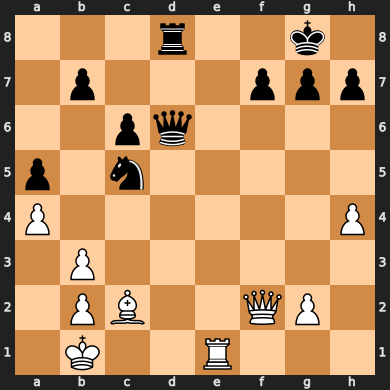

In [15]:
board,y = chess.Board.from_epd("3r2k1/1p3ppp/2pq4/p1n5/P6P/1P6/1PB2QP1/1K2R3 w - - am Rd1")
bm=list(y.values())[0][0]
moves,values=deepbot.get_move_values(board)
sort=join_and_sort(moves,values)
print(bm)
print(sort)
board

f5d4
[[Move.from_uci('f5d4') 1.0]
 [Move.from_uci('h7h5') 0.9145516074450084]
 [Move.from_uci('h7h6') 0.9145516074450084]
 [Move.from_uci('a5d5') 0.9145516074450084]
 [Move.from_uci('f5h4') 0.9043993231810491]
 [Move.from_uci('b6b5') 0.9043993231810491]
 [Move.from_uci('f5e7') 0.9043993231810491]
 [Move.from_uci('d7d5') 0.9027072758037225]
 [Move.from_uci('g8g7') 0.9018612521150592]
 [Move.from_uci('a5a6') 0.9001692047377327]
 [Move.from_uci('a7a6') 0.8934010152284264]
 [Move.from_uci('d7d6') 0.8917089678510999]
 [Move.from_uci('f5d6') 0.8908629441624365]
 [Move.from_uci('d8c8') 0.8849407783417935]
 [Move.from_uci('e6e5') 0.8790186125211505]
 [Move.from_uci('f5g7') 0.8654822335025381]
 [Move.from_uci('g6g5') 0.8604060913705583]
 [Move.from_uci('d8a8') 0.8451776649746193]
 [Move.from_uci('d8f8') 0.8367174280879864]
 [Move.from_uci('d7e7') 0.8291032148900169]
 [Move.from_uci('d7c7') 0.8164128595600677]
 [Move.from_uci('g8f8') 0.8071065989847716]
 [Move.from_uci('f5h6') 0.8062605752961083

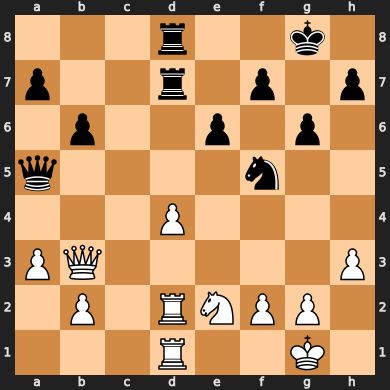

In [16]:
board,y = chess.Board.from_epd("3r2k1/p2r1p1p/1p2p1p1/q4n2/3P4/PQ5P/1P1RNPP1/3R2K1 b - - bm Nxd4")
bm=list(y.values())[0][0]
moves,values=deepbot.get_move_values(board)
sort=join_and_sort(moves,values)
print(bm)
print(sort)
board

In [17]:
engine = chess.engine.SimpleEngine.popen_uci(path)

In [18]:
result = engine.play(board, chess.engine.Limit(depth=20))

In [19]:
result

<PlayResult at 0x257fe004d00 (move=f5d4, ponder=d2d4, info={}, draw_offered=False, resigned=False)>